In this file, I analyse the output of the model ensemble generated with 'Pb-67_make-ensemble.py'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
import xarray as xr


In [2]:
with open('Model_output/20240930-131936_Pb67/XGBoost-67pb_ensamble_predictions.csv', 'r', newline='') as f:
    ensamble_predictions = pd.read_csv(f)
ensamble_predictions

,WOD_latitude [degrees_north],WOD_longitude [degrees_east],Depth,Salinity,Temperature,Silicate,Nitrate,Phosphate,Oxygen,AOU,...,Pb_206_207_rs90,Pb_206_207_rs91,Pb_206_207_rs92,Pb_206_207_rs93,Pb_206_207_rs94,Pb_206_207_rs95,Pb_206_207_rs96,Pb_206_207_rs97,Pb_206_207_rs98,Pb_206_207_rs99
0,-76.5,-179.5,0,34.336,-1.489,66.786,23.699,1.731,329.686,32.191,...,1.170908,1.166635,1.169299,1.166444,1.166715,1.171295,1.169419,1.166521,1.170913,1.170288
1,-76.5,-179.5,5,34.338,-1.504,65.701,23.764,1.726,328.966,32.839,...,1.170908,1.166986,1.169299,1.166435,1.167545,1.171770,1.169419,1.166643,1.170837,1.170344
2,-76.5,-179.5,10,34.340,-1.518,66.094,23.987,1.735,327.762,33.466,...,1.170927,1.166986,1.169190,1.166620,1.167544,1.171661,1.169424,1.167081,1.170999,1.169533
3,-76.5,-179.5,15,34.349,-1.461,66.145,24.062,1.746,326.322,34.773,...,1.169448,1.166004,1.169419,1.165532,1.165374,1.169789,1.167935,1.167803,1.170779,1.168759
4,-76.5,-179.5,20,34.349,-1.469,66.372,24.318,1.761,325.139,36.318,...,1.169430,1.166336,1.169004,1.165419,1.165514,1.169877,1.167989,1.168097,1.171259,1.169268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300568,89.5,179.5,3700,34.953,-0.527,11.339,14.569,1.004,297.053,59.287,...,1.184148,1.183107,1.183751,1.183868,1.184824,1.184954,1.184628,1.185838,1.184977,1.183411
3300569,89.5,179.5,3800,34.952,-0.518,11.356,14.554,1.004,296.844,59.387,...,1.184188,1.183374,1.183779,1.184484,1.184941,1.185131,1.184624,1.186016,1.185355,1.184379
3300570,89.5,179.5,3900,34.954,-0.546,11.325,14.518,1.006,297.770,58.866,...,1.184840,1.183714,1.184300,1.184762,1.184567,1.185140,1.185423,1.185904,1.185387,1.184900
3300571,89.5,179.5,4000,34.942,-0.670,11.228,14.473,1.008,299.008,58.407,...,1.184872,1.184625,1.184177,1.185896,1.185845,1.186897,1.185790,1.186446,1.185758,1.185254


In [3]:
ensamble_predictions['Pb_67_mean'] = ensamble_predictions[ensamble_predictions.columns[ensamble_predictions.columns.str.startswith('Pb_206_207_rs')]].mean(axis=1)
ensamble_predictions['Pb_67_std'] = ensamble_predictions[ensamble_predictions.columns[ensamble_predictions.columns.str.startswith('Pb_206_207_rs')]].std(axis=1)
ensamble_predictions['Pb_67_CoV'] = ensamble_predictions['Pb_67_std'] / ensamble_predictions['Pb_67_mean'] * 100
ensamble_predictions

,WOD_latitude [degrees_north],WOD_longitude [degrees_east],Depth,Salinity,Temperature,Silicate,Nitrate,Phosphate,Oxygen,AOU,...,Pb_206_207_rs93,Pb_206_207_rs94,Pb_206_207_rs95,Pb_206_207_rs96,Pb_206_207_rs97,Pb_206_207_rs98,Pb_206_207_rs99,Pb_67_mean,Pb_67_std,Pb_67_CoV
0,-76.5,-179.5,0,34.336,-1.489,66.786,23.699,1.731,329.686,32.191,...,1.166444,1.166715,1.171295,1.169419,1.166521,1.170913,1.170288,1.168949,0.002361,0.202015
1,-76.5,-179.5,5,34.338,-1.504,65.701,23.764,1.726,328.966,32.839,...,1.166435,1.167545,1.171770,1.169419,1.166643,1.170837,1.170344,1.169157,0.002377,0.203279
2,-76.5,-179.5,10,34.340,-1.518,66.094,23.987,1.735,327.762,33.466,...,1.166620,1.167544,1.171661,1.169424,1.167081,1.170999,1.169533,1.168963,0.002298,0.196568
3,-76.5,-179.5,15,34.349,-1.461,66.145,24.062,1.746,326.322,34.773,...,1.165532,1.165374,1.169789,1.167935,1.167803,1.170779,1.168759,1.168103,0.002302,0.197087
4,-76.5,-179.5,20,34.349,-1.469,66.372,24.318,1.761,325.139,36.318,...,1.165419,1.165514,1.169877,1.167989,1.168097,1.171259,1.169268,1.168427,0.002277,0.194853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300568,89.5,179.5,3700,34.953,-0.527,11.339,14.569,1.004,297.053,59.287,...,1.183868,1.184824,1.184954,1.184628,1.185838,1.184977,1.183411,1.184258,0.000956,0.080699
3300569,89.5,179.5,3800,34.952,-0.518,11.356,14.554,1.004,296.844,59.387,...,1.184484,1.184941,1.185131,1.184624,1.186016,1.185355,1.184379,1.184647,0.001052,0.088791
3300570,89.5,179.5,3900,34.954,-0.546,11.325,14.518,1.006,297.770,58.866,...,1.184762,1.184567,1.185140,1.185423,1.185904,1.185387,1.184900,1.184728,0.000969,0.081777
3300571,89.5,179.5,4000,34.942,-0.670,11.228,14.473,1.008,299.008,58.407,...,1.185896,1.185845,1.186897,1.185790,1.186446,1.185758,1.185254,1.185257,0.001171,0.098760


In [4]:
prediction_df_latlon_idxs = ensamble_predictions.set_index(['WOD_latitude [degrees_north]', 'WOD_longitude [degrees_east]', 'Depth'])
prediction_df_latlon_idxs
prediction_xr = xr.Dataset.from_dataframe(prediction_df_latlon_idxs)
prediction_xr

<xarray.Dataset>
Dimensions:                       (WOD_latitude [degrees_north]: 167,
                                   WOD_longitude [degrees_east]: 360, Depth: 102)
Coordinates:
  * WOD_latitude [degrees_north]  (WOD_latitude [degrees_north]) float64 -76....
  * WOD_longitude [degrees_east]  (WOD_longitude [degrees_east]) float64 -179...
  * Depth                         (Depth) int64 0 5 10 15 ... 5300 5400 5500
Data variables: (12/117)
    Salinity                      (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Temperature                   (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Silicate                      (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Nitrate                       (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Phosphate                     (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Oxygen                        (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    ...                            ...
    Pb_206_207_rs97               (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_206_207_rs98               (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_206_207_rs99               (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_67_mean                    (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_67_std                     (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_67_CoV                     (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...

In [5]:
lat = prediction_xr.variables['WOD_latitude [degrees_north]'][:]
lon = prediction_xr.variables['WOD_longitude [degrees_east]'][:]

In [6]:
variable_names = list(prediction_xr.keys())

surface_df = {}
intermediate_df = {}
deep_df = {}
bottom_df = {}

for variable in variable_names:
    if variable not in surface_df.keys():
        surface_df[variable] = []
    surface_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 10)[0][0]])
    if variable not in intermediate_df.keys():
        intermediate_df[variable] = []
    intermediate_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 1000)[0][0]])
    if variable not in deep_df.keys():
        deep_df[variable] = []
    deep_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 2500)[0][0]])
    if variable not in bottom_df.keys():
        bottom_df[variable] = []
    bottom_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 4000)[0][0]])


In [7]:
dfs = [surface_df, intermediate_df, deep_df, bottom_df]
ranges = [np.arange(5,20,5), np.arange(900,1150,50), np.arange(1900,2200,100), np.arange(3800,4300,100)]
titles =['10 m', '1000 m', '2500 m', '4000 m']

facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no ef

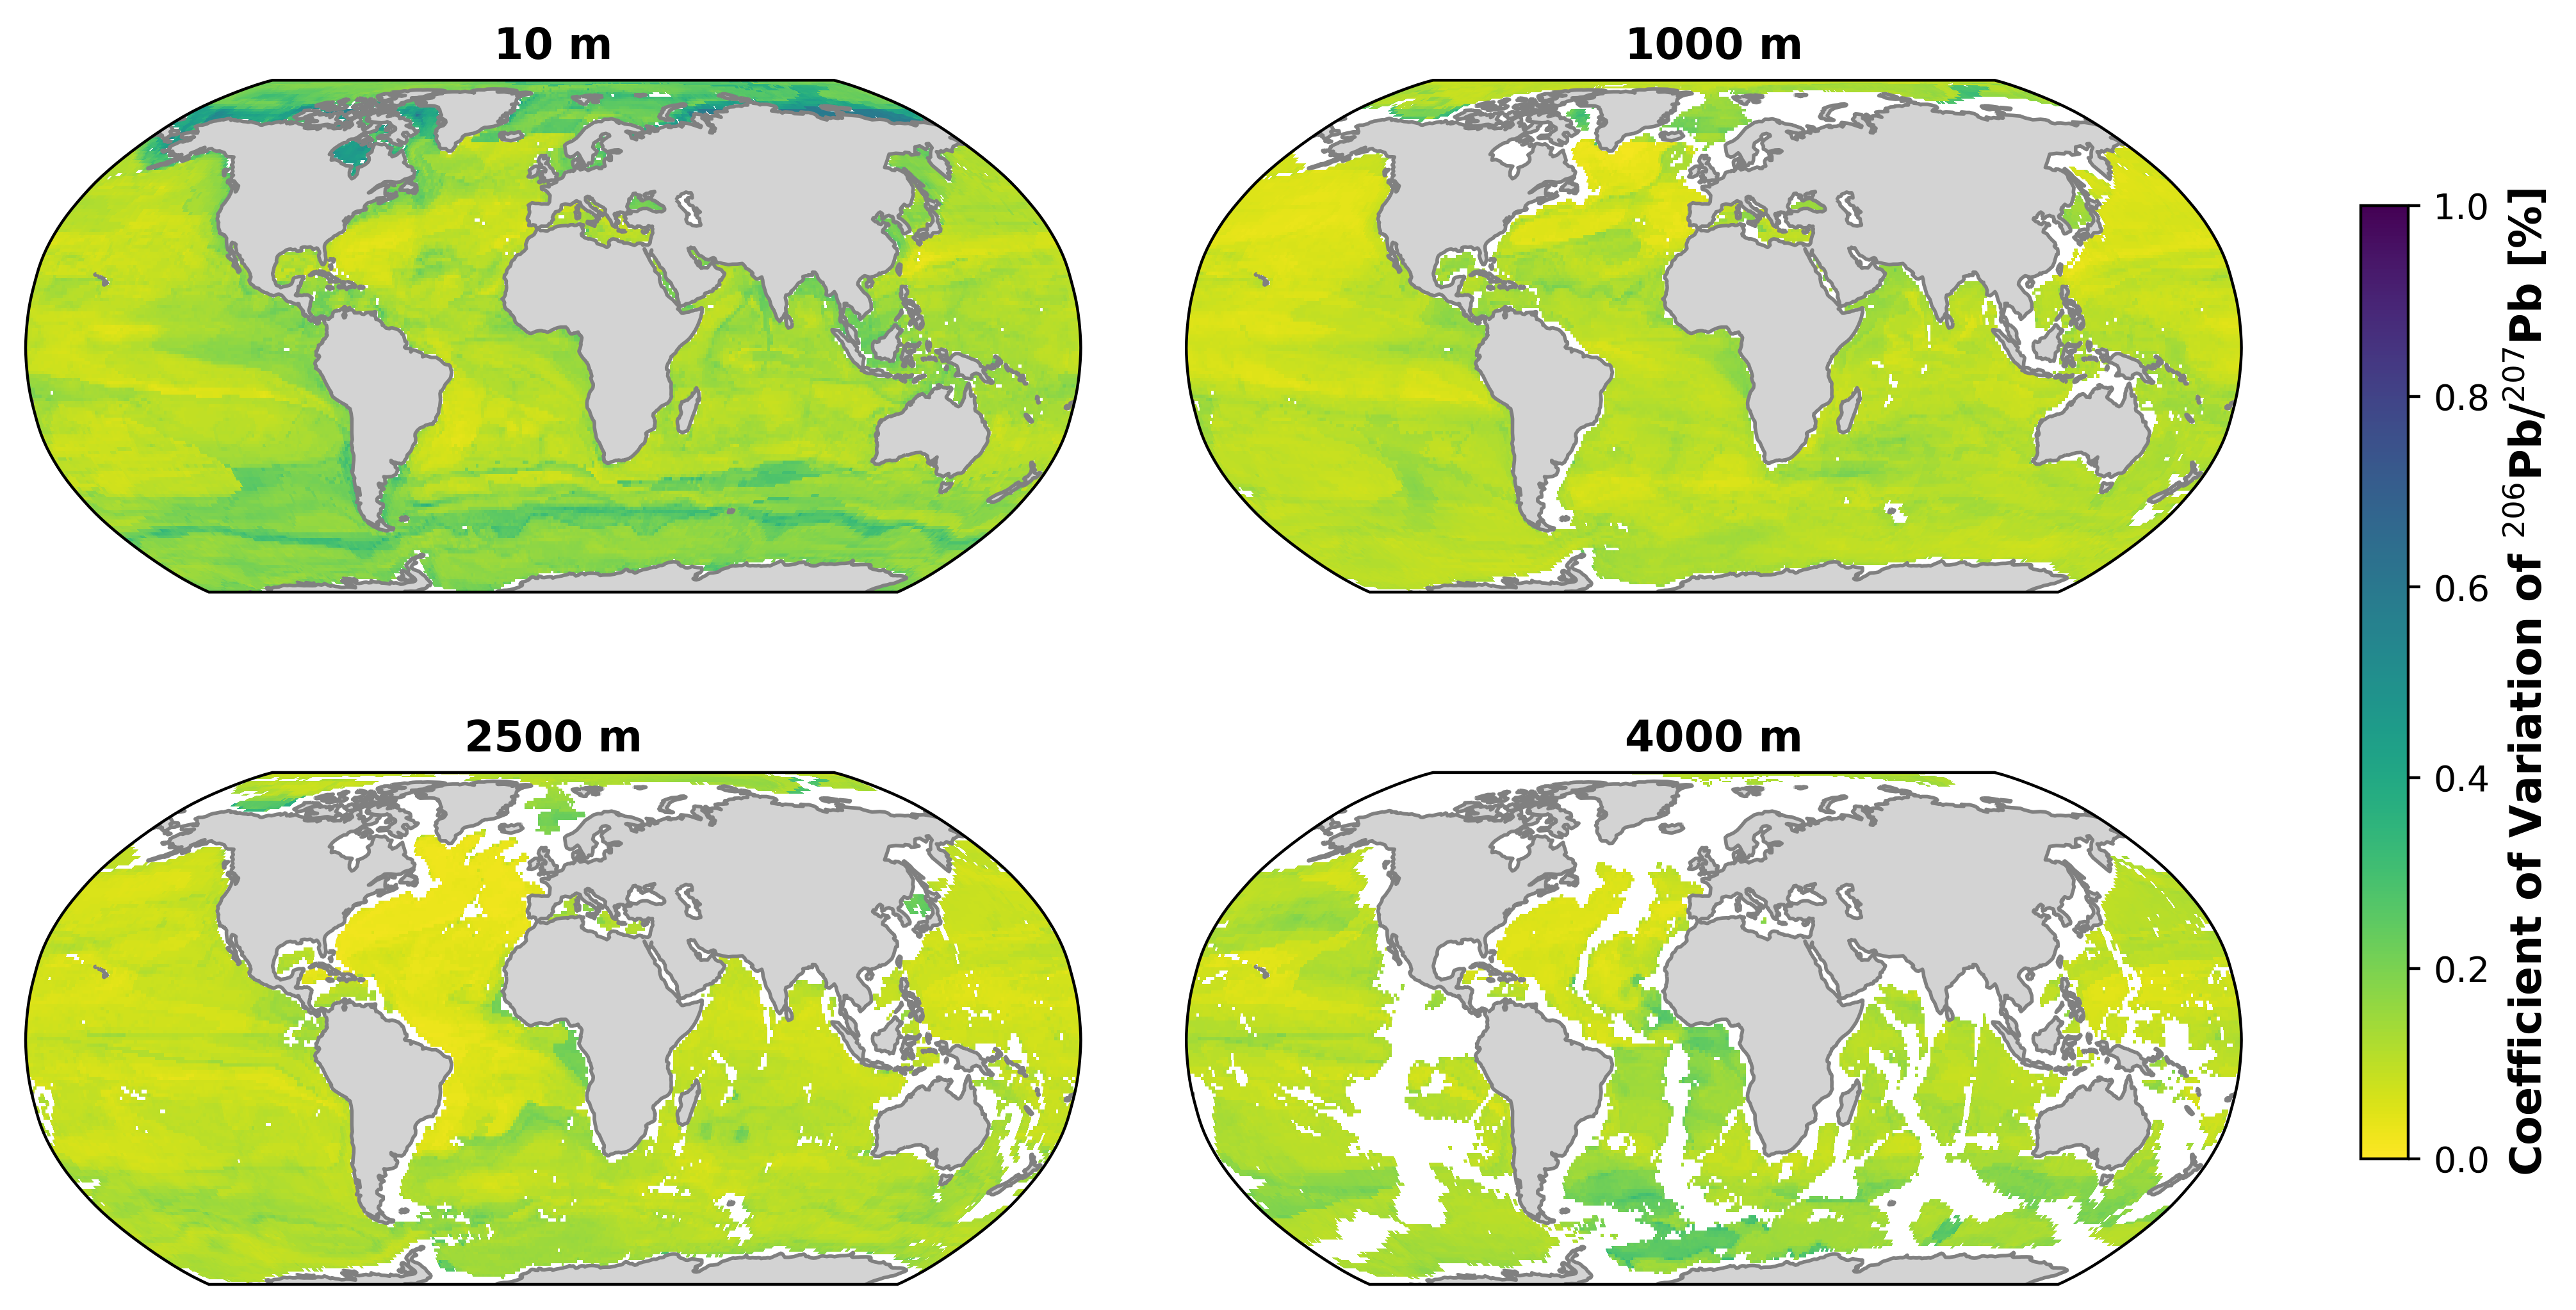

In [8]:
fig, axes = plt.subplots(2,2, figsize=(12,7), dpi = 400, subplot_kw=dict(projection=ccrs.Robinson()), gridspec_kw = {'wspace':0.1, 'hspace':0.005})

for i, ax in enumerate(fig.axes):
    cs = ax.pcolormesh(lon, lat, dfs[i]['Pb_67_CoV'][0], cmap = 'viridis_r', vmin=0, vmax=1, transform=ccrs.PlateCarree(),alpha=1, shading='auto')
    ax.add_feature(cfeature.LAND, color='lightgrey')
    ax.add_feature(cfeature.COASTLINE, color = 'grey')
    ax.set_title(titles[i], fontweight='bold')
    
fig.colorbar(cs, ax=axes.ravel().tolist(), orientation = 'vertical', fraction = 0.02, pad = 0.05).set_label(label='Coefficient of Variation of $^{206}$Pb/$^{207}$Pb [%]', fontweight='bold', fontsize=12)

plt.savefig('../../Figures/For_ms/CoV-Pb_67.jpg')

facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".
facecolor will have no effect as it has been defined as "never".


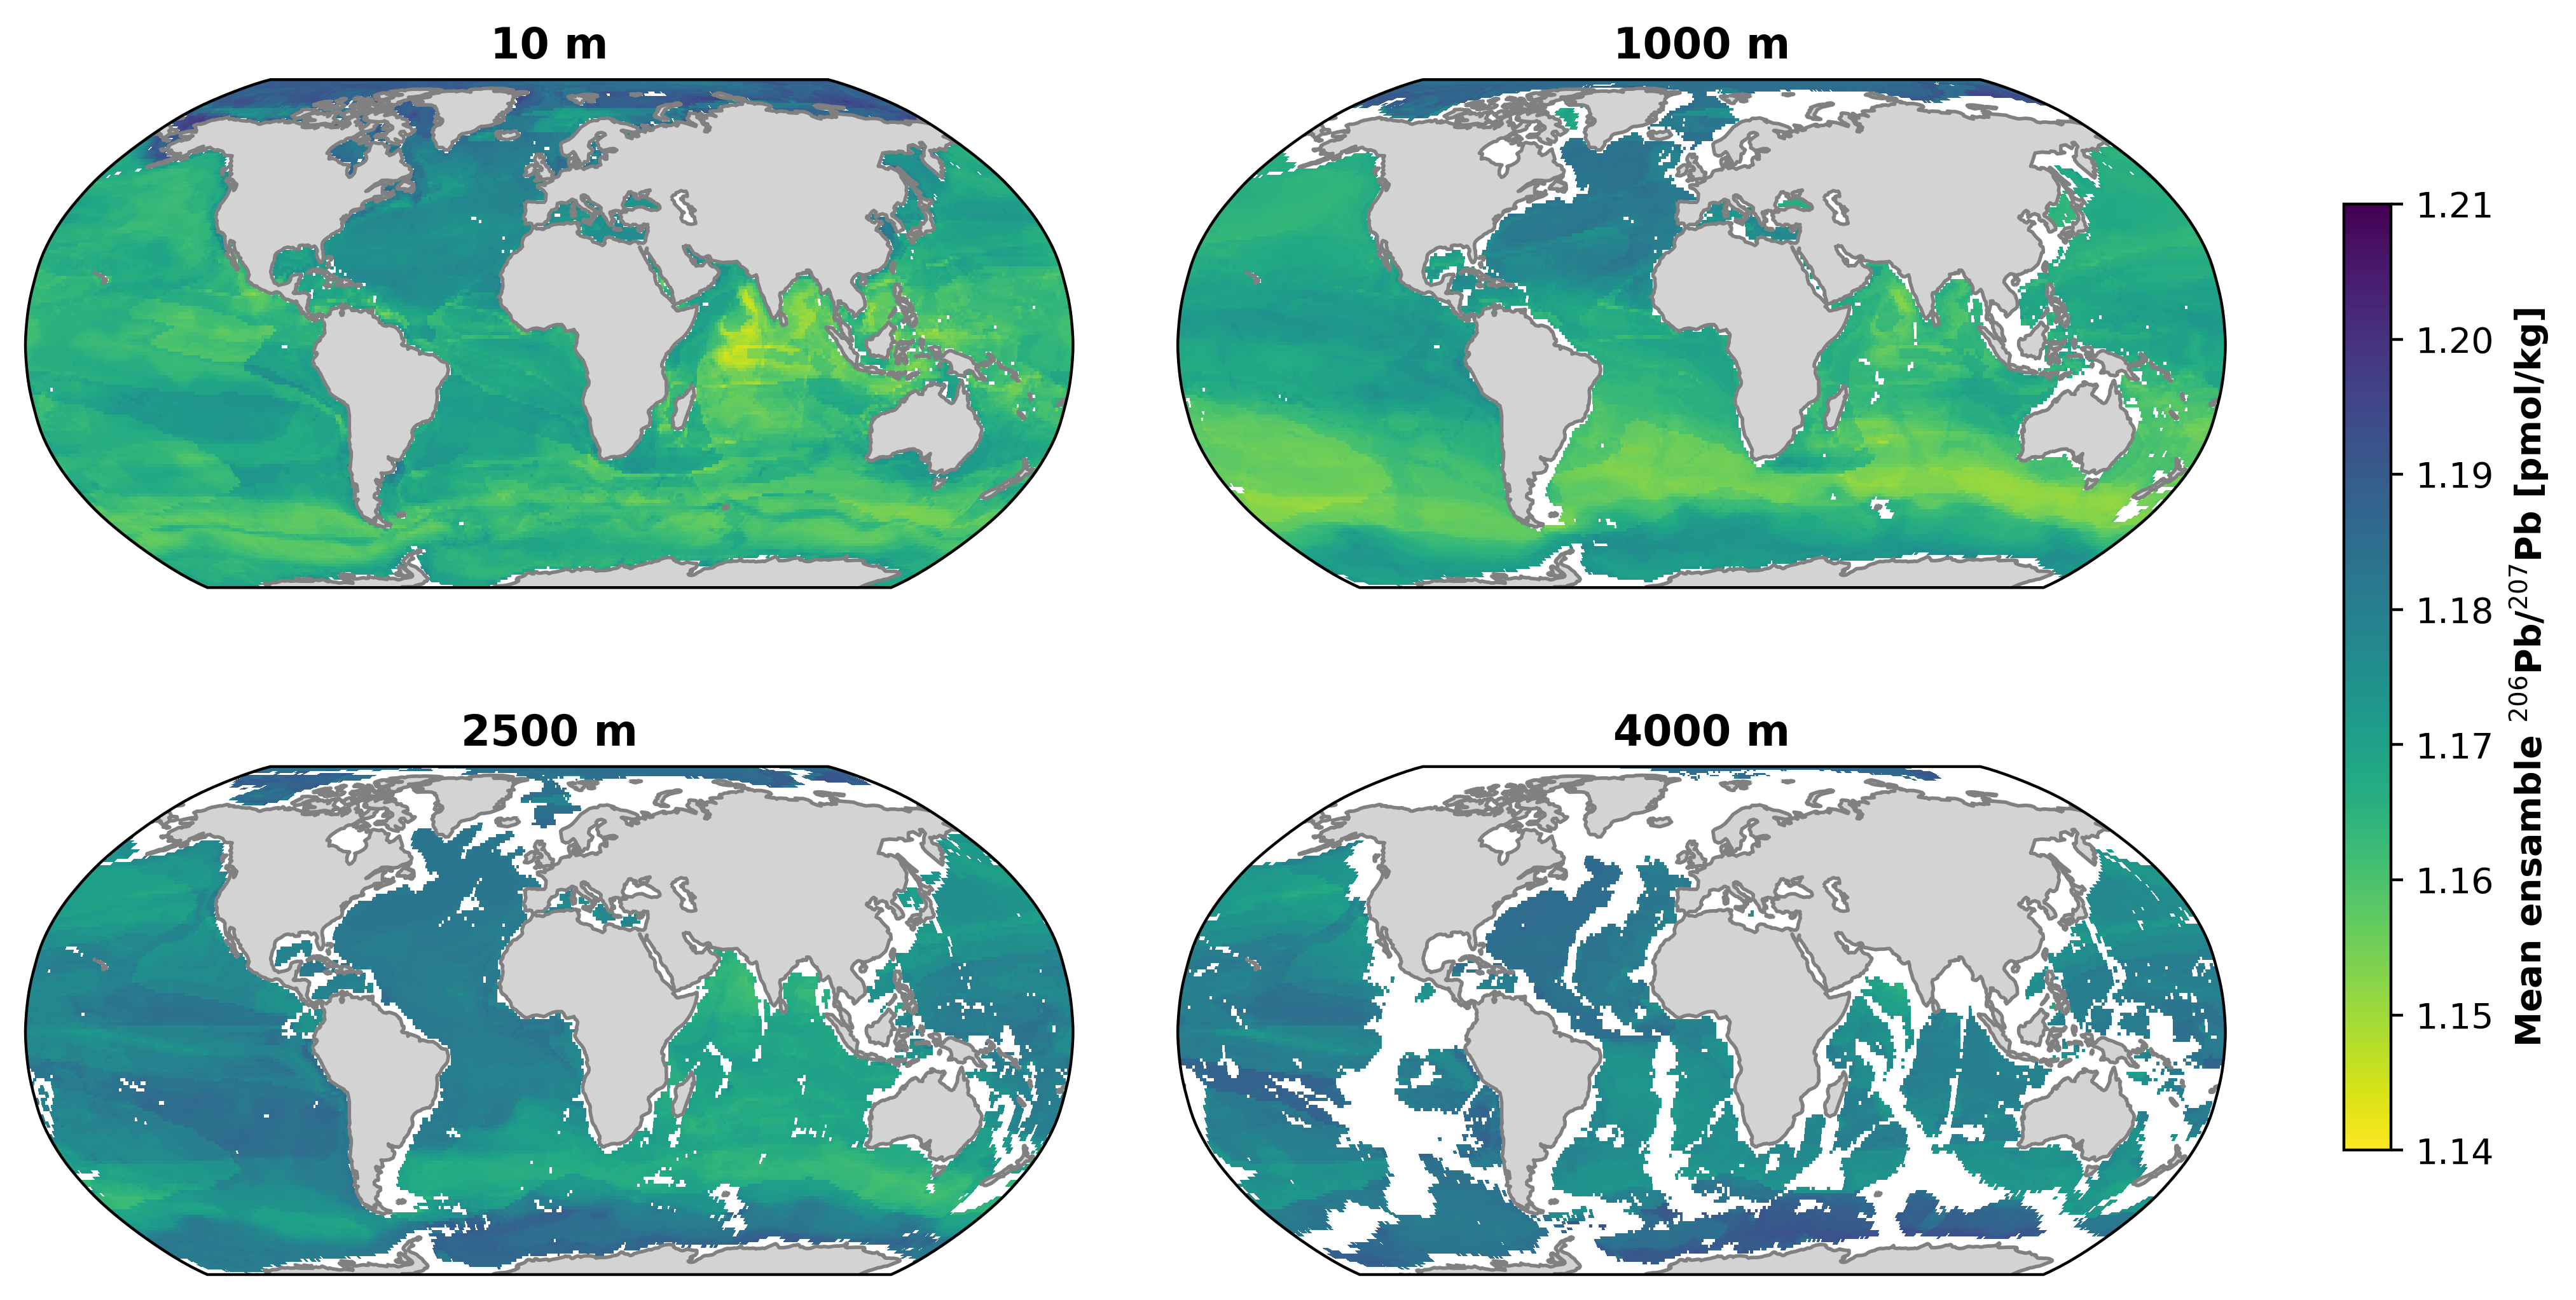

In [9]:
fig, axes = plt.subplots(2,2, figsize=(12,7), dpi = 400, subplot_kw=dict(projection=ccrs.Robinson()), gridspec_kw = {'wspace':0.1, 'hspace':0.005})

for i, ax in enumerate(fig.axes):
    cs = ax.pcolormesh(lon, lat, dfs[i]['Pb_67_mean'][0], cmap = 'viridis_r', vmin=1.14, vmax=1.21, transform=ccrs.PlateCarree(),alpha=1, shading='auto')
    ax.add_feature(cfeature.LAND, color='lightgrey')
    ax.add_feature(cfeature.COASTLINE, color = 'grey')
    ax.set_title(titles[i], fontweight='bold')
    
fig.colorbar(cs, ax=axes.ravel().tolist(), orientation = 'vertical', fraction = 0.02, pad = 0.05).set_label(label='Mean ensamble $^{206}$Pb/$^{207}$Pb [pmol/kg]', fontweight='bold')

#plt.savefig('../../Figures/For_ms/CoV-Pb_67.jpg')